<a href="https://colab.research.google.com/github/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/Copy_of_Multimodal_Fusion_for_PE_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Fusion for Pulmonary Embolism Classification

> by **Mars (Shih-Cheng) Huang**

> email: *mschuang@stanford.edu*

In this demonstration, we will recreate the results from our manuscript *Multimodal fusion with deep neural networks for leveraging CT imaging and electronic health record: a case-study in pulmonary embolism detection*. Specifically, we will build a multimodal fusion model (late fusion) that combines information from both CT scans and Electronic Medical Record (EMR) to automatically diagnose the presence/absence of PE. 

![Workflow](https://github.com/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/sessions/multi-modal-pe/figs/workflow.png?raw=1)

### Motivation

**Clinical Motivation** 

Pulmonary Embolism (PE) is a serious medical condition† that hospitalizes 300,000 people in the United States every year. The gold standard diagnostic modality for PE is Computed Tomography Pulmonary Angiography (CTPA) which is interpreted by radiologists. Studies have shown that prompt diagnosis and treatment can greatly reduce morbidity and mortality. Strategies to automate accurate interpretation and timely reporting of CTPA examinations may successfully triage urgent cases of PE to the immediate attention of physicians, improving time to diagnosis and treatment.

**Technical Motivation** 

Recent advancements in deep learning have led to a resurgence of medical imaging and Electronic Medical Record (EMR) models for a variety of applications, including clinical decision support, automated workflow triage, clinical prediction and more. However, very few models have been developed to integrate both clinical and imaging data, despite that in routine practice clinicians rely on EMR to provide context in medical imaging interpretation.



### Fusion Strategies
![Fusion Strategies](https://github.com/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/sessions/multi-modal-pe/figs/fusion_strategies.png?raw=1)

### Data
We will use a subset of RadFusion, a large-scale multimodal pulmonary embolism detection dataset consisting of 1837 CT imaging studies (comprising 600,000+ 2D CT slices) for 1794 patients and their corresponding EHR summary data. The full dataset with CT scans can be access via the following link: 
- https://stanfordaimi.azurewebsites.net/datasets/3a7548a4-8f65-4ab7-85fa-3d68c9efc1bd

### References
- Huang, Shih-Cheng, et al. "PENet—a scalable deep-learning model for automated diagnosis of pulmonary embolism using volumetric CT imaging." NPJ digital medicine 3.1 (2020): 1-9.
- Huang, Shih-Cheng, et al. "Multimodal fusion with deep neural networks for leveraging CT imaging and electronic health record: a case-study in pulmonary embolism detection." Scientific reports 10.1 (2020): 1-9.
- Zhou, Yuyin, et al. "RadFusion: Benchmarking Performance and Fairness for Multimodal Pulmonary Embolism Detection from CT and EHR." arXiv preprint arXiv:2111.11665 (2021).

## Research Use Agreement

Before we can proceed to download the data, please agree to this **Research Use Agreement** by registering to download from our website:
- https://stanfordaimi.azurewebsites.net/datasets/3a7548a4-8f65-4ab7-85fa-3d68c9efc1bd


![User Agreement](https://github.com/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/sessions/multi-modal-pe/figs/UserAgreement.png?raw=1)


## System Setup & Downloading the Data

In [1]:
!pip install numpy pandas scikit-learn matplotlib
!gdown --id 1w0ocK3br8oqVwn6zK5qgtRaj9Ql37dtd  # /content/Demographics.csv
!gdown --id 1MEhVZ87J2IwFmkgxOi8WjdVKTdwOpDDY  # /content/INP_MED.csv
!gdown --id 1PRgFvQjqEUudeJ0FLR3DbtvqmI7t7sCT  # /content/OUT_MED.csv
!gdown --id 1EDZOYmWrvv6D3XaZrjVous95c9HdiBEx  # /content/Vitals.csv
!gdown --id 1Nlm1ZgibRv6kJBIJkQHkRh8oPqUpELnK  # /content/ICD.csv
!gdown --id 17Y9DJsolaRPyMkk_Xm3w-iCgSOxkQOyf  # /content/LABS.csv
!gdown --id 1JDb5f18uNo2hXXQqcHlRbcjswph1y98h  # /content/Vision.csv

Downloading...
From: https://drive.google.com/uc?id=1w0ocK3br8oqVwn6zK5qgtRaj9Ql37dtd
To: /content/Demographics.csv
100% 59.8k/59.8k [00:00<00:00, 27.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MEhVZ87J2IwFmkgxOi8WjdVKTdwOpDDY
To: /content/INP_MED.csv
100% 4.77M/4.77M [00:00<00:00, 75.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PRgFvQjqEUudeJ0FLR3DbtvqmI7t7sCT
To: /content/OUT_MED.csv
100% 4.79M/4.79M [00:00<00:00, 75.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EDZOYmWrvv6D3XaZrjVous95c9HdiBEx
To: /content/Vitals.csv
100% 97.1k/97.1k [00:00<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nlm1ZgibRv6kJBIJkQHkRh8oPqUpELnK
To: /content/ICD.csv
100% 1.06M/1.06M [00:00<00:00, 55.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=17Y9DJsolaRPyMkk_Xm3w-iCgSOxkQOyf
To: /content/LABS.csv
100% 266k/266k [00:00<00:00, 36.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JDb5f18uNo2hXXQqcHlRbcjswph1y98h
To: /co

## Data Exploration
After downloading the data, you should be able to find the following files in your directory: 
    
- Demographics.csv 
- INP_MED.csv
- OUT_MED.csv
- Vitals.csv
- ICD.csv
- LABS.csv
- Vision.csv

Let's explore the contents in each file.

In [2]:
! ls /content

Demographics.csv  INP_MED.csv  OUT_MED.csv  Vision.csv
ICD.csv		  LABS.csv     sample_data  Vitals.csv


In [3]:
# import libraries
import pandas as pd
import numpy as np

### Patient Demographics

The demographic features consist of one-hot encoded gender, race and smoking habits and the age as a numeric variable.

In [4]:
demo_df = pd.read_csv('/content/Demographics.csv')
print(demo_df.shape)
demo_df.head(5)

(1837, 13)


idx  current_age_yrs  Female  Male  ...  Unknown_race  White  SMOKER_N  SMOKER_Y
0   890            80.00       1     0  ...             0      1         1         0
1  1879            64.12       0     1  ...             0      1         0         1
2  1783            93.42       0     1  ...             0      1         0         1
3  3896            93.82       1     0  ...             0      1         1         0
4  1193            71.78       1     0  ...             0      1         1         0

[5 rows x 13 columns]

### Inpatient & Outpatient Medications

641 unique classes of drugs were identified for inpatient & outpatient medication. Each medication was represented as both the frequency within the 12-month window and a binary label of whether the drug was prescribed to the patient.

In [5]:
out_med_df = pd.read_csv('/content/OUT_MED.csv')
print(out_med_df.shape)
out_med_df.head(5)

(1837, 1283)


idx  ...  Outpatient_ACNE AGENTS,SYSTEMIC:Frequeny
0    84  ...                                         0
1  2248  ...                                         0
2  2271  ...                                         0
3  1691  ...                                         0
4  3286  ...                                         0

[5 rows x 1283 columns]

In [6]:
in_med_df = pd.read_csv('/content/INP_MED.csv')
print(in_med_df.shape)
in_med_df.head(5)

(1837, 1283)


idx  ...  ACNE AGENTS,SYSTEMIC:Frequeny
0    84  ...                              0
1  2248  ...                              0
2  2271  ...                              0
3  1691  ...                              0
4  3286  ...                              0

[5 rows x 1283 columns]

### ICD Codes

We excluded all ICD codes with less than 1% occurrences in the training dataset and collapsed into top diagnosis categories, which resulted in a total of 141 diagnosis groups. We used a binary presence/absence as well as a frequency to represent diagnosis code as features. All ICD codes recorded with the same encounter number as the patient’s CT exam, or within a 24 hour window prior to their CT examination, were dropped to avoid data leakage.

In [7]:
icd_df = pd.read_csv('/content/ICD.csv')
print(icd_df.shape)
icd_df.head(5)

(1837, 283)


idx  ...  SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES:presence
0    84  ...                                                  0                                                          
1  2248  ...                                                  0                                                          
2  2271  ...                                                  0                                                          
3  1691  ...                                                  0                                                          
4  3286  ...                                                  0                                                          

[5 rows x 283 columns]

### Lab Tests

We identified 22 lab tests and represented each test as binary presence/absence as well as the latest value of the test.

In [8]:
lab_df = pd.read_csv('/content/LABS.csv')
print(lab_df.shape)
lab_df.head(5)

(1837, 45)


idx  albumin:Binary  alk:Binary  ...  ptt:Value  sodium:Value  wbc:Value
0    84               1           1  ...        0.0           0.0        0.3
1  2248               1           1  ...        0.0           0.0       13.8
2  2271               1           1  ...       15.9           0.0        6.8
3  1691               1           1  ...        0.0           0.0       10.0
4  3286               1           1  ...       21.7           0.0        4.0

[5 rows x 45 columns]

### Vitals

For vitals, we included systolic and diastolic blood pressure, height, weight, body mass index (BMI), temperature, respiration rate, pulse oximetry (spO2) and heart rate. The vitals were represented with respect to their sensitivity to change, which was computed by taking the derivative of the vital values along the temporal axis.

In [9]:
vitals_df = pd.read_csv('/content/Vitals.csv')
vitals_df.head(5)

idx  SBP  DBP  height_inch  ...  tempf  respirations  spO2  pulse
0    84  0.0  0.0          0.0  ...   0.00           0.0   0.0    0.0
1  2248  0.0  0.0          0.0  ...   0.00           0.0   0.0    0.0
2  2271  0.0 -7.0        -48.5  ...  44.30         -28.5   5.0   12.0
3  1691  5.0  0.0        -48.0  ...  43.05         -28.5   4.5   18.0
4  3286  0.0  0.0          0.0  ...   0.00           0.0   0.0    0.0

[5 rows x 10 columns]

### CTs Scans

The RadFusion dataset includes CTPA scans for each study. Due to time and computational constraint, we have ran inference on these CT scans using PENet, and stored the prediction probabilities in **Vision.csv**. Additional, this csv file incldues the labels (PE positive / PE negative), the type of PE (central, segmental and sub-segmental) and the train/val/test split used to develope PENet. For more information about PENet, please refer to: 
- Manuscript: [https://www.nature.com/articles/s41746-020-0266-y](https://www.nature.com/articles/s41746-020-0266-y)
- GitHub: [https://github.com/marshuang80/penet](https://github.com/marshuang80/penet)

In [10]:
# TODO, remove pe_type if label = 0
vision_df = pd.read_csv('/content/Vision.csv')
vision_df.head(5)

Unnamed: 0   idx  label      pred    pe_type  split
0           0  1436      0  0.405236        NaN  train
1           1  1880      1  0.836337  segmental  train
2           2  2738      0  0.596504        NaN    val
3           3  2883      0  0.108968        NaN  train
4           4  2302      1  0.808755  segmental  train

## Process Data

We are going to pre-process the EMR data by: 
- Remove any features with zero variance 
- Normalize all features to be within the same range

Next, we are going to combine all the EMR features into one dataframe

In [11]:
processed_emr_dfs = []
for df in [demo_df, out_med_df, in_med_df, icd_df, lab_df, vitals_df]:
    # remove zero variance featurs
    df = df.loc[:,df.apply(pd.Series.nunique) != 1]
    
    # set index 
    df = df.set_index('idx')

    # normalize features
    df = df.apply(lambda x: (x - x.mean())/(x.std()))
    
    processed_emr_dfs.append(df)

emr_df = pd.concat(processed_emr_dfs, axis=1)
emr_df.head(5)

current_age_yrs    Female      Male  ...  respirations      spO2     pulse
idx                                       ...                                  
0           0.141129 -1.163783  1.163783  ...      0.304327  0.344230  0.290821
1          -1.176230 -1.163783  1.163783  ...      0.283688  0.346826  0.290449
2          -1.176230 -1.163783  1.163783  ...      0.283688  0.346826  0.290449
3           0.073883  0.858799 -0.858799  ...      0.304327  0.344230  0.290821
4           0.410111  0.858799 -0.858799  ...      0.304327  0.344230  0.290821

[5 rows x 1505 columns]

## Create Data Splits

Next, we are going to create training, validation and test splits to develop our models. We want to make sure that we use the same data splits as the vision model (PENet), so we will join our EMR dataframe with the vision dataframe.

In [12]:
# Define columns
EMR_FEATURE_COLS = emr_df.columns.tolist()
PE_TYPE_COL = 'pe_type'
SPLIT_COL = 'split'
VISION_PRED_COL = 'pred'
EMR_PRED_COL = 'emr_pred'
FUSION_PRED_COL = 'late_fusion_pred'
LABEL_COL = 'label'

# Join vision information with emr dataframe
vision_df = vision_df.set_index('idx')
df = pd.concat([vision_df, emr_df], axis=1)

# Create data splits
df_dev = df[(df[SPLIT_COL] == 'train') | (df[SPLIT_COL] == 'val')]  # for gridsearch CV
df_train = df[df[SPLIT_COL] == 'train']
df_val = df[df[SPLIT_COL] == 'val']
df_test = df[df[SPLIT_COL] == 'test']

## Train EMR Model
For our EMR data, we are going to train a simple logistic regression model.

In particular we are going to train the logistic regression model with the elasticnet penalty, which linearly combines the L₁ and L₂ penalties of the lasso and ridge methods.

We will use the **LogisticRegression** class from sklearn for this task.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Uncomment and run grid search if time permits
"""
# define model
clf = LogisticRegression(
    penalty='elasticnet', solver='saga', random_state=0
)

# define grid search
param_grid = {
    "C": [0.01, 0.1, 1.0, 100], 
    "max_iter": [10, 100, 1000],
    "l1_ratio": [0.01, 0.25, 0.5, 0.75, 0.99]
}
gsc = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=10
)

# run grid search
gsc.fit(df_dev[EMR_FEATURE_COLS], df_dev[LABEL_COL])
print(f"Best parameters: {gsc.best_params_}")
clf = gsc.best_estimator_
"""

clf = LogisticRegression(
    penalty='elasticnet', 
    solver='saga', 
    random_state=0,
    C= 0.1, 
    class_weight='balanced', 
    l1_ratio= 0.99, 
    max_iter= 1000
)
clf.fit(df_train[EMR_FEATURE_COLS], df_train[LABEL_COL])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.99, max_iter=1000,
                   penalty='elasticnet', random_state=0, solver='saga')

## Test EMR Model

Using the trained EMR model, we will run inference on our held-out test set and extract the prediction probabilities.

In [14]:
# test with best model
emr_prob = clf.predict_proba(df_test[EMR_FEATURE_COLS])

# take probability of positive class 
emr_prob = [p[1] for p in emr_prob]

df_test = df_test.assign(emr_pred = emr_prob)

## Late Fusion (Mean Aggregation)

<img src="https://github.com/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/sessions/multi-modal-pe/figs/late_fusion_mean_agg.png?raw=1" width="200">

Now that we are have prediction probabilities from both the EMR and Vision model, we will apply a simple late fusion strategy with mean aggregation. 

In [15]:
# Late fusion by taking the average prediction probability from vision model and emr model
late_fusion_pred = np.mean(
    [df_test[EMR_PRED_COL], df_test[VISION_PRED_COL]], 
    axis=0
)
df_test = df_test.assign(late_fusion_pred = late_fusion_pred)

## Evaluate Performance

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(7, 7))
lw = 2

def plot_auc(df, label):
    # PENet performance
    fpr_v, tpr_v, _ = metrics.roc_curve(
        df[LABEL_COL], 
        df[VISION_PRED_COL])
    roc_auc_v = metrics.auc(fpr_v, tpr_v)
    plt.plot(
        fpr_v, 
        tpr_v, 
        color='darkorange',
        lw=lw, 
        label='PENet ROC curve (area = %0.2f)' % roc_auc_v)

    # EMR model performance
    fpr_emr, tpr_emr, _ = metrics.roc_curve(
        df[LABEL_COL], 
        df[EMR_PRED_COL])
    roc_auc_emr = metrics.auc(fpr_emr, tpr_emr)
    plt.plot(
        fpr_emr, 
        tpr_emr,
        lw=lw, 
        label='EMR Model ROC curve (area = %0.2f)' % roc_auc_emr)

    # Fusion model performance
    fpr_fusion, tpr_fusion, _ = metrics.roc_curve(
        df[LABEL_COL], 
        df[FUSION_PRED_COL])
    roc_auc_fusion = metrics.auc(fpr_fusion, tpr_fusion)
    plt.plot(
        fpr_fusion, 
        tpr_fusion,
        lw=lw, 
        label='Fusion Model ROC curve (area = %0.2f)' % roc_auc_fusion)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 0.95])
    plt.ylim([0.0, 1.05])
    plt.axes().set_aspect('equal', 'datalim')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic ({label})')
    plt.legend(loc="lower right")

    plt.show()

<Figure size 504x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


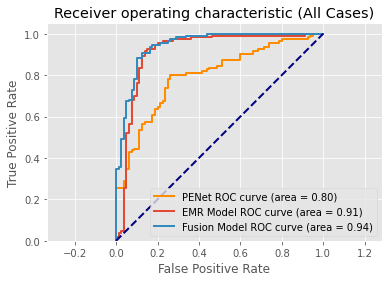

In [17]:
# Performance for all cases
plot_auc(df_test, 'All Cases')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


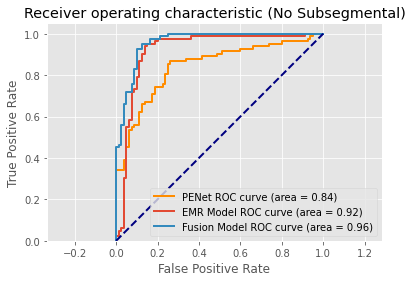

In [18]:
# Performance for non-subsegmental cases
df_test_no_subseg = df_test[
    df_test[PE_TYPE_COL] != 'subsegmental']
plot_auc(df_test_no_subseg, 'No Subsegmental')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

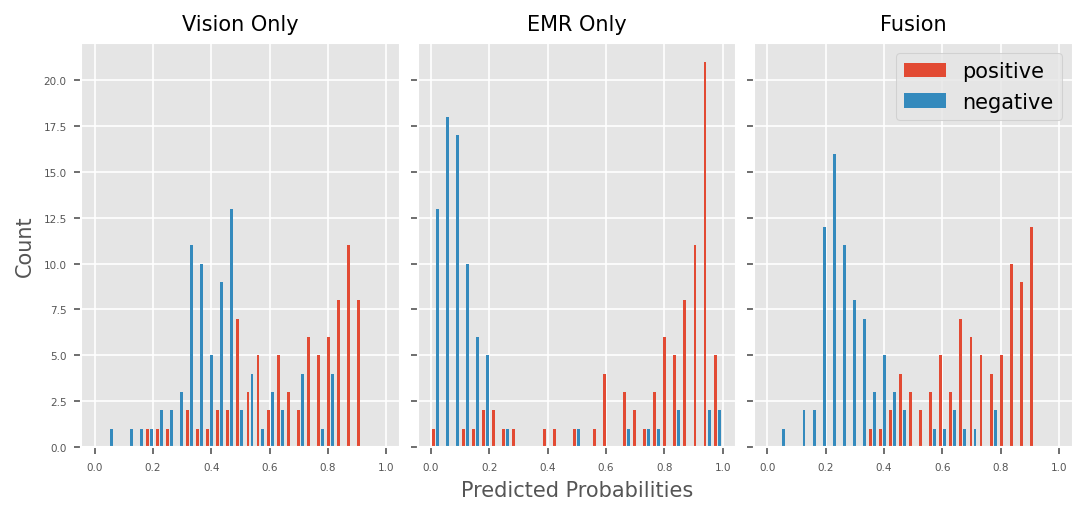

In [19]:
# Visualize histogram of Predicted Probs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# style
plt.clf()
plt.style.use('ggplot')
matplotlib.rc('xtick', labelsize=5) 
matplotlib.rc('ytick', labelsize=5) 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(7,3), dpi=150)
bins = np.linspace(0, 1, 30)

# seperate cases into positive and negative
positive_cases = df_test_no_subseg[
    df_test_no_subseg[LABEL_COL] == 1]
negative_cases = df_test_no_subseg[
    df_test_no_subseg[LABEL_COL] == 0]

# PENet
ax1.hist(
    [positive_cases[VISION_PRED_COL], negative_cases[VISION_PRED_COL]], 
    bins, 
    label=['positive','negative'], 
    width=0.01)

# EMR
ax2.hist(
    [positive_cases[EMR_PRED_COL], negative_cases[EMR_PRED_COL]], 
    bins, 
    label=['positive', 'negative'], 
    width=0.01)

# Fusion
ax3.hist(
    [positive_cases[FUSION_PRED_COL], negative_cases[FUSION_PRED_COL]], 
    bins, 
    label=['positive','negative'], 
    width=0.01)

f.tight_layout(pad=0.5)
plt.legend(loc='upper right')
ax2.set_xlabel("Predicted Probabilities", fontsize = 10)
ax1.set_ylabel("Count", fontsize = 10)
ax1.set_title('Vision Only', fontsize = 10)
ax2.set_title('EMR Only', fontsize = 10)
ax3.set_title('Fusion', fontsize = 10)
plt.show()

# Bonus: Other Fusion Strategies

![OtherFusionStrategies](https://github.com/marshuang80/AI-Deep-Learning-Lab-2021/blob/multimodal-pe/sessions/multi-modal-pe/figs/other_fusion_strategies.png?raw=1)

In [20]:
# Try out other fusion strategies here

## Option 1: Use another classifier for our EMR model (SVC, Decision Tree, Neural Networks...) 
## Option 2: Use another aggregator for late fusion (Max, Meta-classifier)
## Option 3: Train separate classfiers for each type of EMR data before fusion (ICD, Vitals, Demographics ...)